# Data Visualization
## Overview of the Influence of Different Characteristics on the Dataset

Let's look at how the data looks like depending on how we set the parameters.
First import some basic classes as well as the PiecewiseSinusoidal class from src.data that provides an
easy way for creating the synthetic data.
Additionally, use the InputOutputVisualization class from src.visualize to make the plotting easier

In [11]:
import numpy as np
from src.data.synthetic_dataset import PiecewiseSinusoidal, Frequency
from src.data.sampler import MeanSamplerConstant, AmplitudeSamplerConstant
from src.visualization.visualize import InputOutputVisualization


## Setting the Influence of noise

Now we set how large the influence of noise is supposed to be. We will run two examples, one for
no noise and one where we have some noise:

In [12]:
sigmas = [0, 8]

## Now we define the different values for the other characteristics:

In [13]:
freqs = {"low": Frequency.LOW, "high": Frequency.HIGH}
inp_sequence_len = {str(x): x for x in [64, 128, 256, 512]}
delay_lengths = {"long-term": 32, "short-term": 0}

## Amplitude Sampling
Next we have to choose how the amplitudes and mean values for the time series are sampled. To
make the visualizations more insightful we use two dummy samplers that always return the same values:

In [14]:
amplitudes_sampler = AmplitudeSamplerConstant(amplitudes=[60, 40, 20])
mean_sampler = MeanSamplerConstant(mean_value=72)

## Visualization of Samples without noise
Now we start the actual sampling of the different time series by creating one instance of the PiecewiseSinusoidal
class for each possible combination of the properties as defined above. Note that first we only do this
for the case where we have no noise present in our dataset.

To create a nice visualization we keep track of one sample from each Dataset, the input parameters of the
dataset and the point where we want to start the prediction

In [15]:
no_noise_samples = []
no_noise_titles = []
no_noise_pred_start = []
for inp_len_name, inp_len in inp_sequence_len.items():
    for f_name, f in freqs.items():
        for delay_length_name, delay_length in delay_lengths.items():
            pws = PiecewiseSinusoidal(
                sequence_length=inp_len * 2,
                delay_length=delay_length * inp_len // 64, # Delay depends on sequence length
                sigma=sigmas[0],
                frequency=f,
                amplitude_sampler=amplitudes_sampler,
                mean_sampler=mean_sampler
            )
            no_noise_samples.append(pws.sample(1)[0])
            no_noise_titles.append(f"$f = {f.value}, seqlen = {inp_len}, delaylen = {delay_length}$")
            no_noise_pred_start.append(inp_len)

## Visualize!

Now we can create a big plot that shows all the differnt characteristics

2021-07-09 11:53:13,797 - src.visualization - INFO - using latex font


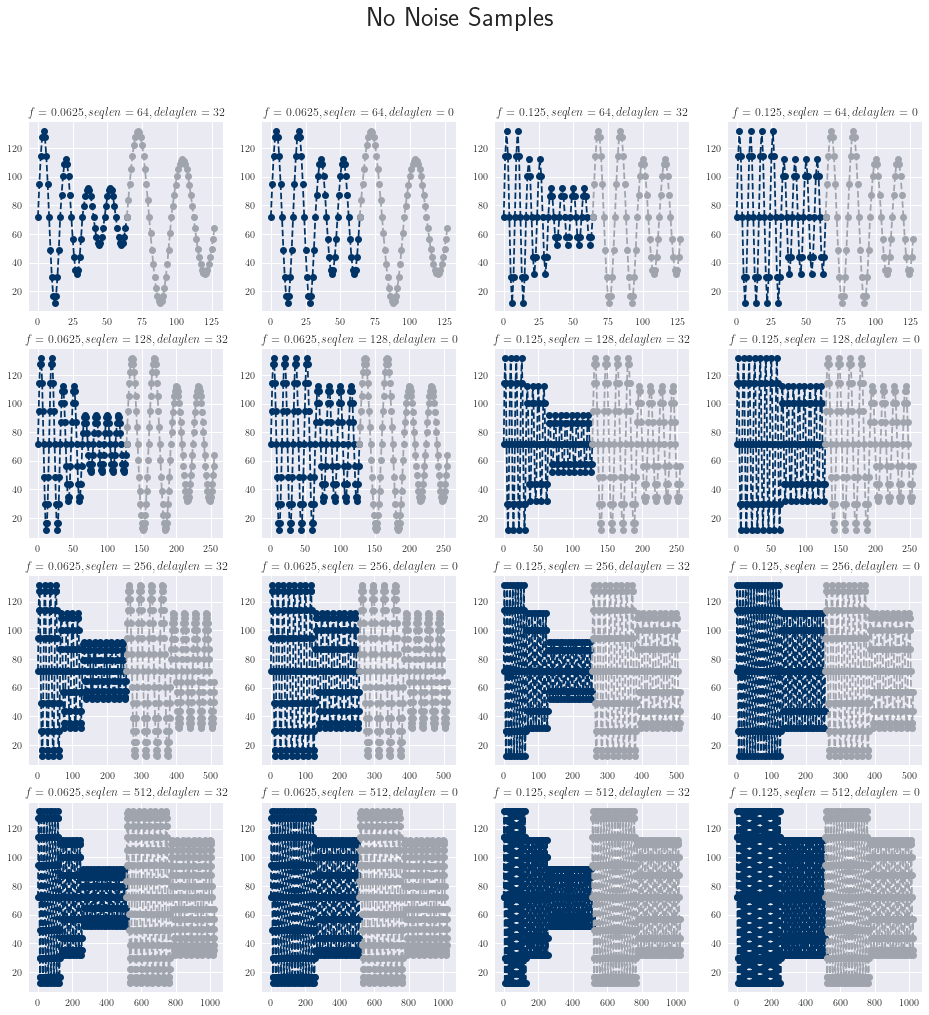

In [16]:
use_latex_font = True
viz = InputOutputVisualization(use_latex_font=use_latex_font)
viz.subplots(nrows=len(inp_sequence_len), ncols=len(freqs) * len(delay_lengths), figsize=(16, 16))
viz.plot(no_noise_samples, pred_starts=no_noise_pred_start)
viz.fig.suptitle("No Noise Samples")
viz.add_subplot_titles(titles=no_noise_titles)
viz.save(filename="figures/no_noise_all_variations")
viz.plt.show()

Repeat the same steps as above but now for Noisy Data

<Figure size 576x396 with 0 Axes>

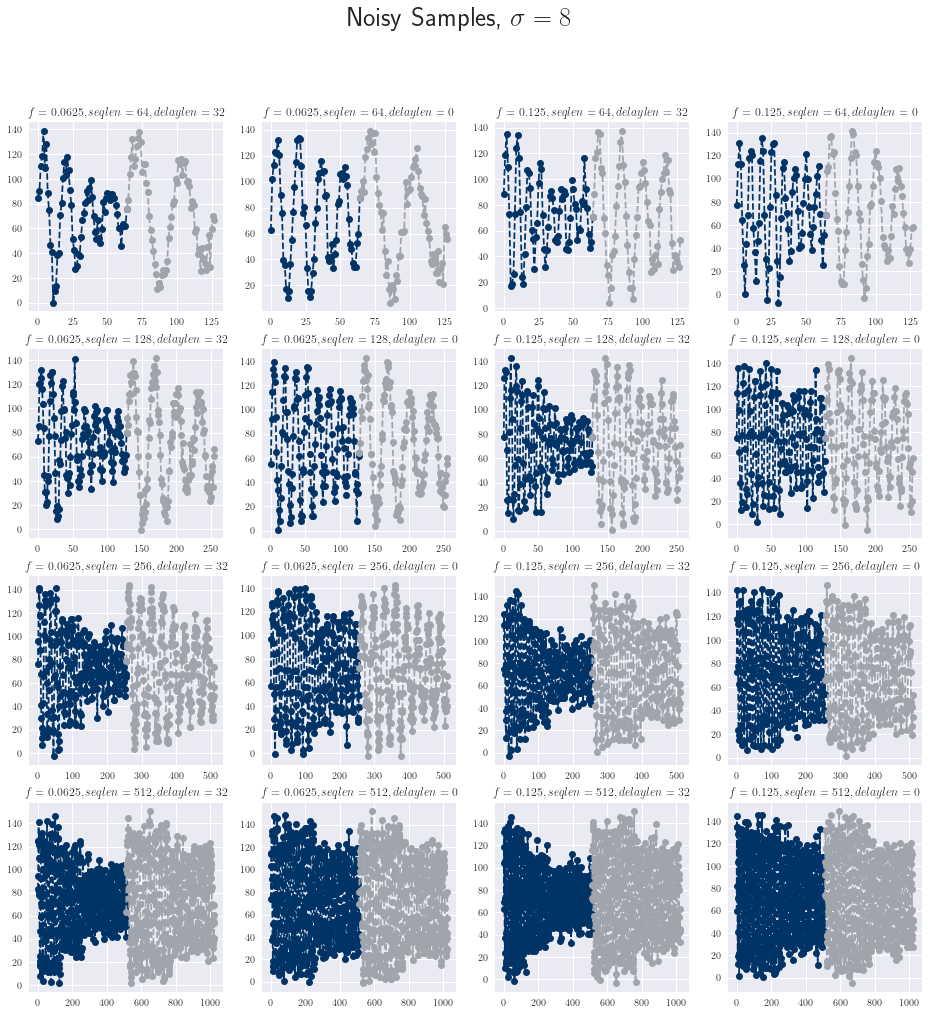

In [17]:
# noisy samples
noise_samples = []
noise_titles = []
noise_pred_start = []
np.random.seed(1)
for inp_len_name, inp_len in inp_sequence_len.items():
    for f_name, f in freqs.items():
        for delay_length_name, delay_length in delay_lengths.items():
            pws = PiecewiseSinusoidal(
                sequence_length=inp_len * 2,
                delay_length=delay_length * inp_len // 64,
                sigma=sigmas[1],
                frequency=f,
                amplitude_sampler=amplitudes_sampler,
                mean_sampler=mean_sampler
            )
            noise_samples.append(pws.sample(1)[0])
            noise_titles.append(f"$f = {f.value}, seqlen = {inp_len}, delaylen = {delay_length}$")
            noise_pred_start.append(inp_len)


viz.plt.clf()
viz.subplots(nrows=len(inp_sequence_len), ncols=len(freqs) * len(delay_lengths), figsize=(16, 16))
viz.plot(noise_samples, pred_starts=noise_pred_start)
viz.fig.suptitle(f"Noisy Samples, $\sigma = {sigmas[1]}$")
viz.add_subplot_titles(titles=noise_titles)
viz.save(filename="figures/noise_all_variations")
viz.plt.show()



## Visualization of different samples

2021-07-09 11:53:20,612 - src.visualization - INFO - using latex font


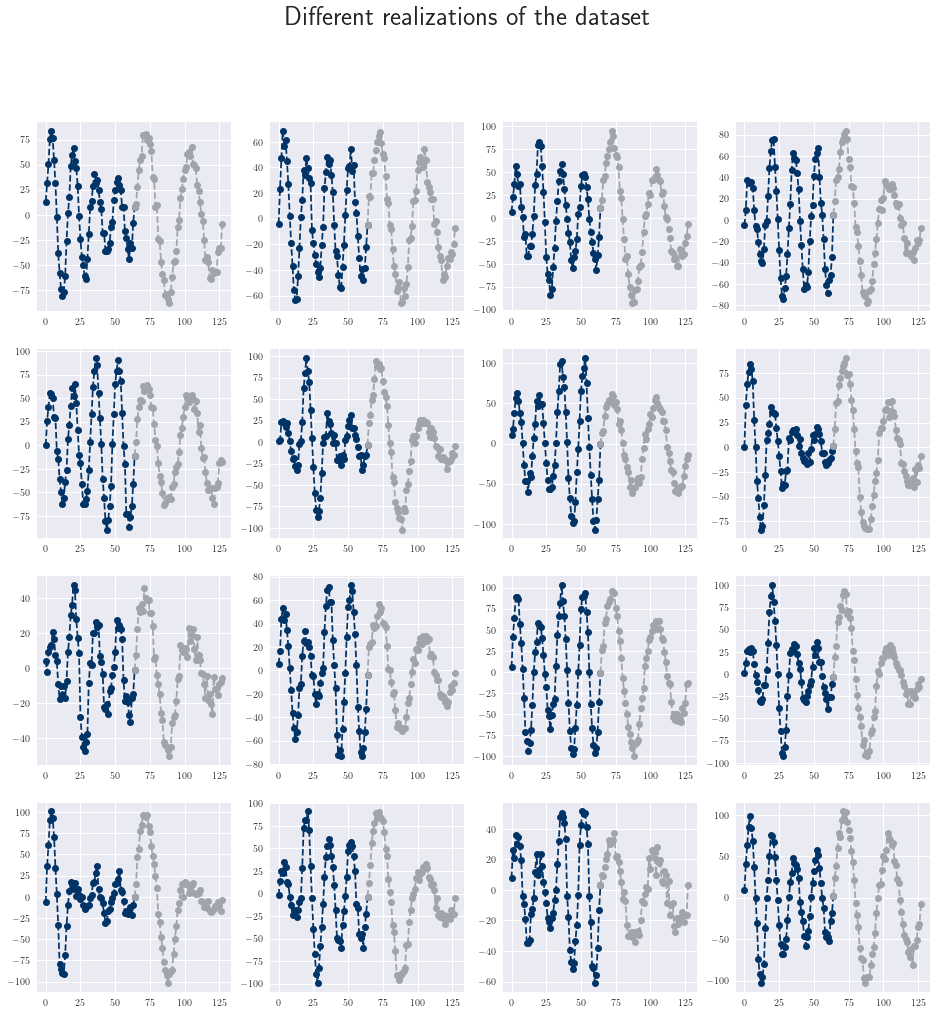

In [18]:
from src.data.sampler import AmplitudeSamplerUniformInteger

# set data characteristics
sample_num=16
samples = []
titles = []
inp_sequence_len = 64
delay_len = 32
sigma = 5
freq = Frequency.LOW

# sample from dataset
pws = PiecewiseSinusoidal(
    sequence_length=inp_sequence_len * 2,
    delay_length=delay_len,
    sigma=sigma,
    frequency=freq,
    amplitude_sampler=AmplitudeSamplerUniformInteger(ranges=np.array([[15, 101], [15, 101], [15, 101]])),
    mean_sampler=MeanSamplerConstant(mean_value=0),
)
samples = pws.sample(sample_num)
pred_starts = [inp_sequence_len, ] * sample_num

# create visualizations
use_latex_font = True
viz = InputOutputVisualization(use_latex_font=use_latex_font)
viz.subplots(nrows=sample_num//4, ncols=4, figsize=(16, 16))
viz.plot(samples, pred_starts=pred_starts)
viz.fig.suptitle(f"Different realizations of the dataset")
viz.add_subplot_titles(titles=(["",] * sample_num))

viz.save(filename="figures/different_realizations")
viz.plt.show()


# Comparison of Two Approaches for Low vs High Time Delay

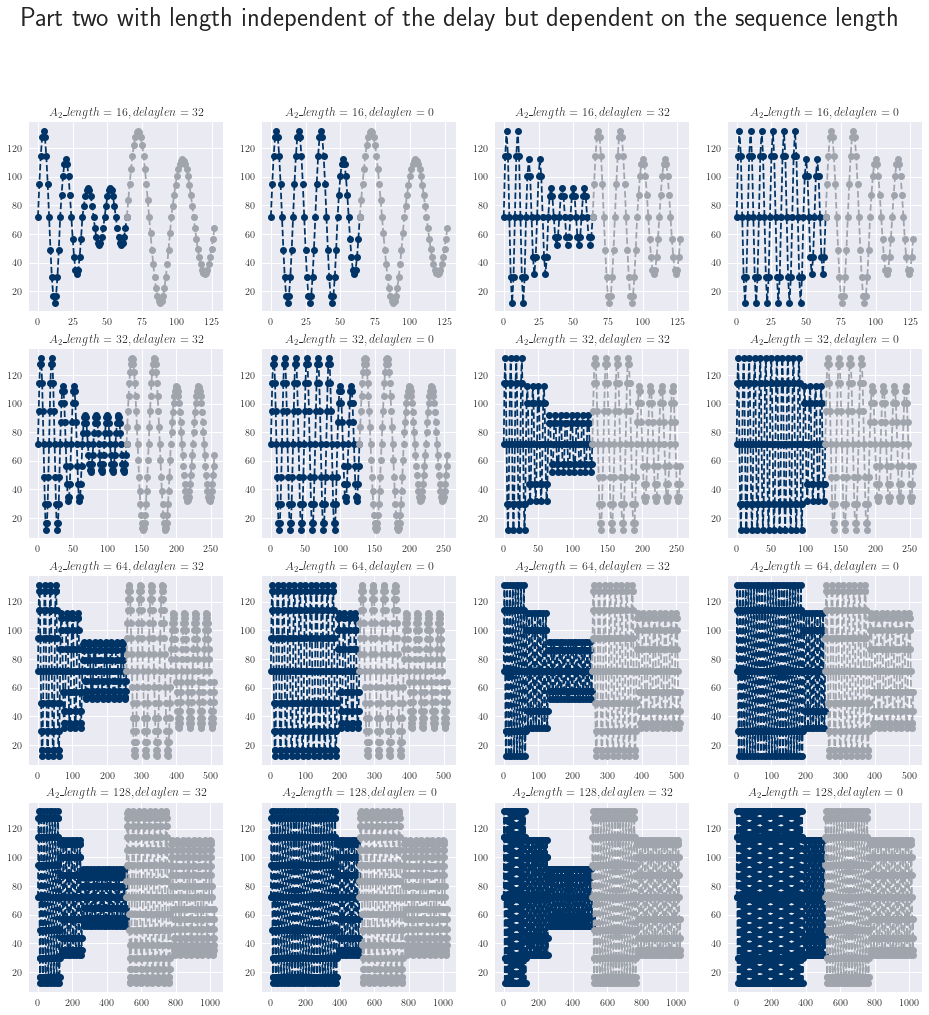

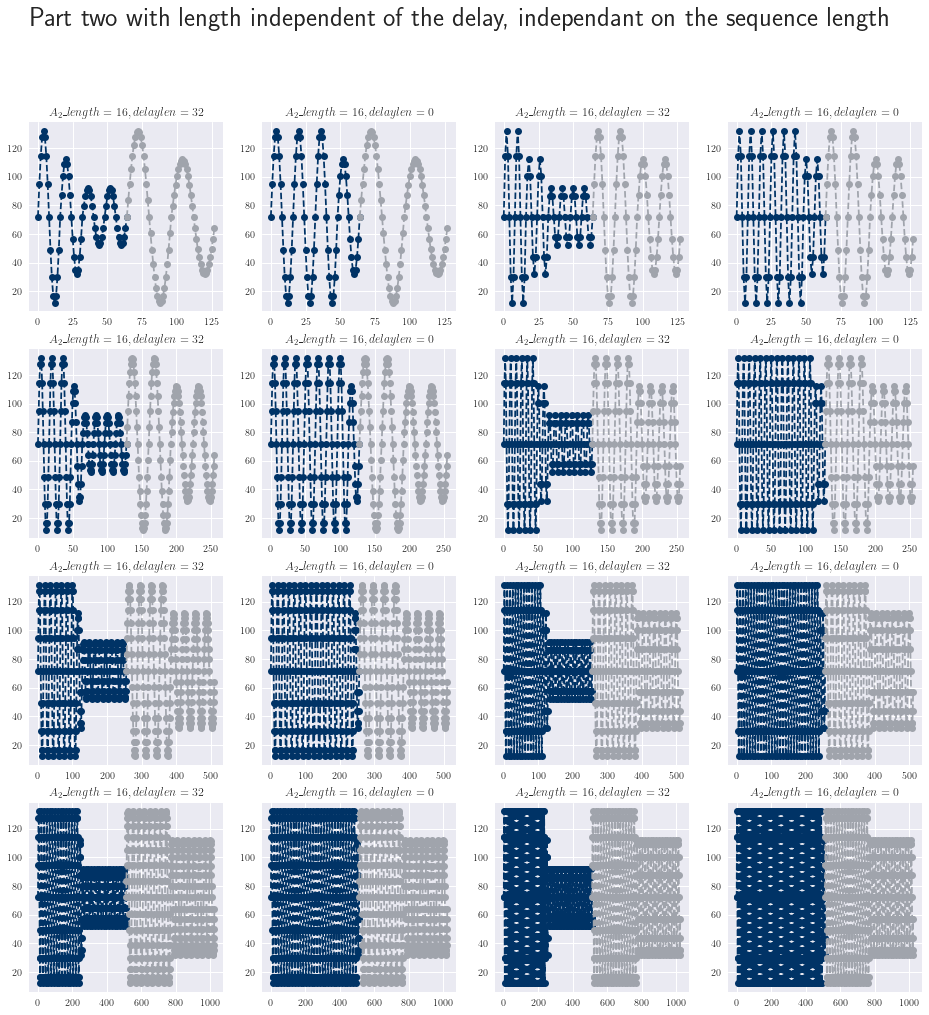

In [23]:
from src.data.synthetic_dataset import PiecewiseSinusoidalFixedLengthPartTwo
part_two_length = 16
min_len = 64
sigma = 0
freqs = {"low": Frequency.LOW, "high": Frequency.HIGH}
inp_sequence_len = {str(x): x for x in [min_len, min_len*2, min_len*4, min_len*8]}
delay_lengths = {"long-term": 32, "short-term": 0}

amplitudes_sampler = AmplitudeSamplerConstant(amplitudes=[60, 40, 20])
mean_sampler = MeanSamplerConstant(mean_value=72)

no_noise_samples = []
no_noise_titles = []
no_noise_pred_start = []
for inp_len_name, inp_len in inp_sequence_len.items():
    for f_name, f in freqs.items():
        for delay_length_name, delay_length in delay_lengths.items():
            # part two length is independant on the sequence length
            part_two_length_relative = part_two_length * inp_len // 64

            pws = PiecewiseSinusoidalFixedLengthPartTwo(
                part_two_length=part_two_length_relative,
                sequence_length=inp_len * 2,
                delay_length=delay_length * inp_len // min_len,
                sigma=sigma,
                frequency=f,
                amplitude_sampler=amplitudes_sampler,
                mean_sampler=mean_sampler
            )
            no_noise_samples.append(pws.sample(1)[0])
            no_noise_titles.append(f"$A_2\_ length = {part_two_length_relative}, delaylen = {delay_length}$")
            no_noise_pred_start.append(inp_len)


# create visualizations
viz = InputOutputVisualization(use_latex_font=False)
viz.subplots(nrows=sample_num//4, ncols=4, figsize=(16, 16))
viz.plot(no_noise_samples, pred_starts=no_noise_pred_start)
viz.fig.suptitle(f"Part two with length independent of the delay but dependent on the sequence length")
viz.add_subplot_titles(titles=no_noise_titles)
viz.save(filename="figures/consta_part_two_relative")
viz.plt.show()

# Alternative approach
amplitudes_sampler = AmplitudeSamplerConstant(amplitudes=[60, 40, 20])
mean_sampler = MeanSamplerConstant(mean_value=72)

no_noise_samples = []
no_noise_titles = []
no_noise_pred_start = []
for inp_len_name, inp_len in inp_sequence_len.items():
    for f_name, f in freqs.items():
        for delay_length_name, delay_length in delay_lengths.items():
            # part two length is dependant on the sequence length
            part_two_length_relative = part_two_length
            pws = PiecewiseSinusoidalFixedLengthPartTwo(
                part_two_length=part_two_length_relative,
                sequence_length=inp_len * 2,
                delay_length=delay_length * inp_len // min_len,
                sigma=sigma,
                frequency=f,
                amplitude_sampler=amplitudes_sampler,
                mean_sampler=mean_sampler
            )
            no_noise_samples.append(pws.sample(1)[0])
            no_noise_titles.append(f"$A_2\_length= {part_two_length_relative}, delaylen = {delay_length}$")
            no_noise_pred_start.append(inp_len)


# create visualizations
viz = InputOutputVisualization(use_latex_font=False)
viz.subplots(nrows=sample_num//4, ncols=4, figsize=(16, 16))
viz.plot(no_noise_samples, pred_starts=no_noise_pred_start)
viz.fig.suptitle(f"Part two with length independent of the delay, independant on the sequence length")
viz.add_subplot_titles(titles=no_noise_titles)
viz.save(filename="figures/consta_part_two")
viz.plt.show()